# Homework 4

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import math

# Problem 1

1a) Make a scatter plot (not a line plot) of the first 1000 data points.

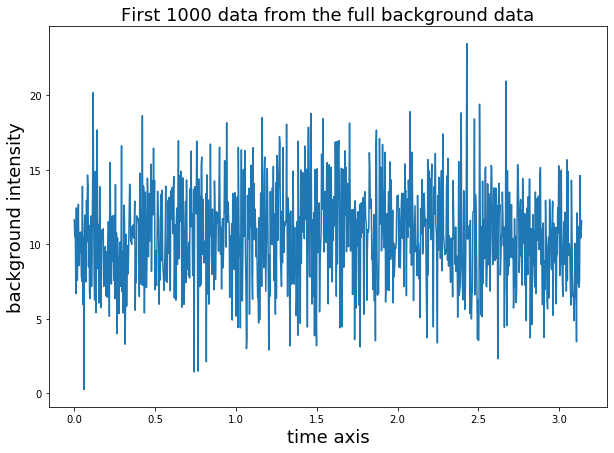

In [26]:
plt.rcParams["figure.figsize"] = (10,7)
fig, ax = plt.subplots(1, 1)

t = np.linspace(0,np.pi*100,np.int(1e5))
N = 10+np.sin(t)
bkgd = stats.norm.rvs(size=np.int(1e5))*np.sqrt(N)+N

n=1000
sub_data_t = t[0:n]
sub_data_bkgd = bkgd[0:n]
ax.plot(sub_data_t,sub_data_bkgd)
plt.xlabel('time', fontsize=18)
plt.ylabel('background intensity', fontsize=18)
plt.title("First 1000 data from the full background data", fontsize=18);


1b) Generalize your code so you can make a plot of any X contiguous points (e.g. 2000 points starting at point 500), and produce an example plot of a set of data somethere in the middle of your array.

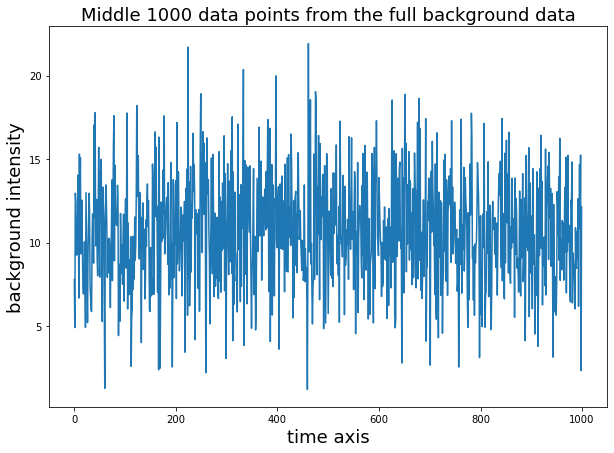

In [32]:
mid = round(bkgd.size/2)
length_of_pts = 1000
sub_data = bkgd[mid:mid+length_of_pts]
plt.plot(sub_data);

plt.xlabel('time', fontsize=18)
plt.ylabel('background intensity', fontsize=18)
plt.title("Middle 1000 data points from the full background data", fontsize=18);


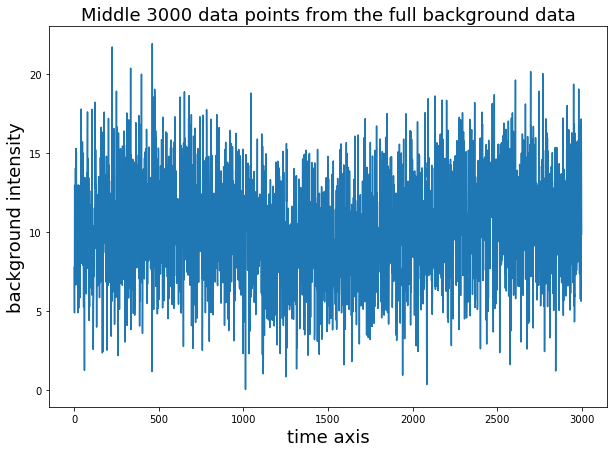

In [35]:
mid = round(bkgd.size/2)
length_of_pts = 3000
sub_data = bkgd[mid:mid+length_of_pts]
plt.plot(sub_data);

plt.xlabel('time', fontsize=18)
plt.ylabel('background intensity', fontsize=18)
plt.title("Middle 3000 data points from the full background data", fontsize=18);

1c) Sometimes you want to sample the data, such as plotting every 100th point. Make a plot of the full data range, but only every 100th point.

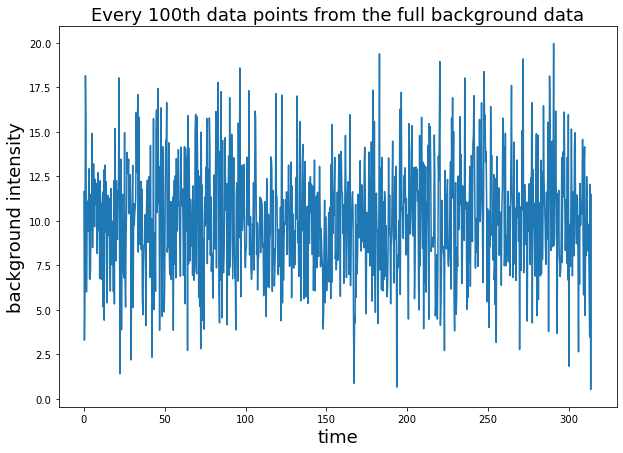

In [37]:
# Take every 100th point from the full data range
n = bkgd.size

sub_data_every_100th_bkgd = np.zeros(0,dtype=int)
sub_data_every_100th_t = np.zeros(0,dtype=int)

for i in range(0,n):
    if i%100==0:
        sub_data_every_100th_bkgd = np.append(sub_data_every_100th_bkgd,bkgd[i])
        sub_data_every_100th_t = np.append(sub_data_every_100th_t,t[i])

# Plot these 100th points
plt.rcParams["figure.figsize"] = (10,7)
fig, ax = plt.subplots(1, 1)
ax.plot(sub_data_every_100th_t,sub_data_every_100th_bkgd);  

plt.xlabel('time', fontsize=18)
plt.ylabel('background intensity', fontsize=18)
plt.title("Every 100th data points from the full background data", fontsize=18);



# Problem 2
Now you can make a scatter plot of just a 100,000 points, so you might try it to see what it looks like. But particularly in the central areas the points all overlap into just a blob, and this just gets worse as the number of points goes up. What is better is to plot the density of the points. There are several ways of doing this, but a 2D histogram plot is the easiest (plt.hist2d() in python and histogram2() in MatLab).

2a) Make a 2d histogram plot. Read about options, and play with binsize so it is useful (too large a bin and everything washes out, too small and the sample noise dominates). Make sure you use a colorbar.


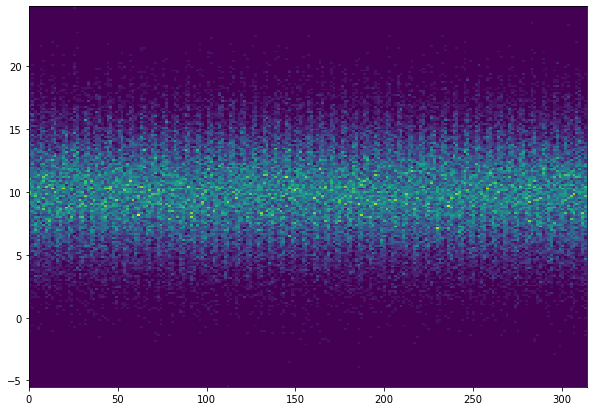

In [6]:
plt.hist2d(t,bkgd,bins=200);

2b) Clearly explain what is being plotted in your plot (e.g. what does each color mean?)



This 2d histogram is plotting the intensity of the background vs time where the x axis is the time axis and the y axis is the background intensity. The difference between this 2d histogram and the scatter plot is that this 2d histogram shows the frequency of these background intensity by varying the color. The more infrequent the intensity, the darker the color.  Here we can see that the most frequent intensity is somewhere around 10 across all x axis because that is very the color is teh brightest (light green to yelloish color).

# Problem 3: folding

Now if you have a periodic signal, it is possible to fold the data stream at that period to make the pattern clearer.

3a) Make an new time variable that folds at a period of $2\pi$ (the modulo operator is your friend, variably expressed as mod(), %, or rem()). Then make a scatter plot of all your data, but now folded. (Reminder, for more data you'd never actually want to plot all the points.)


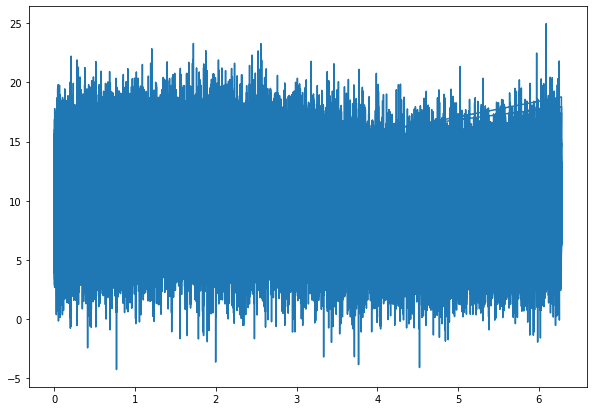

In [38]:
import math
plt.rcParams["figure.figsize"] = (10,7)
fig, ax = plt.subplots(1, 1)


t = np.linspace(0,np.pi*100,np.int(1e5))
N = 10+np.sin(t)
bkgd = stats.norm.rvs(size=np.int(1e5))*np.sqrt(N)+N

       
t_fold = t % (2*np.pi)
plt.plot(t_fold, bkgd);



3b) Make a 2D histogram plot of your folded data.


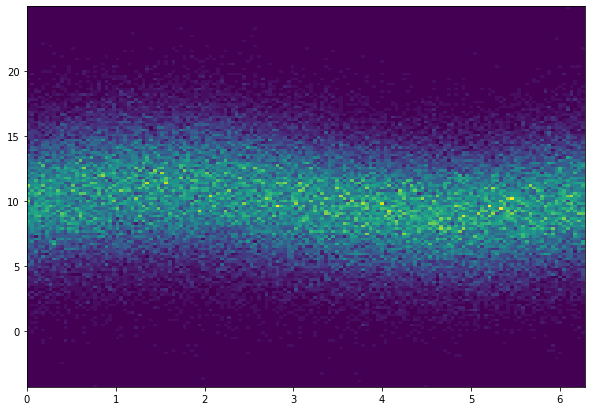

In [39]:
plt.hist2d(t_fold,bkgd,bins=150);

Optional, but very fun and useful:

3c) You can use 2D histograms or digitize functions, plus some math, to calculate the average as a function of the folded variable. You can then overplot this on 3b to show the average as a function of folded time. 